In [1]:
from collections import OrderedDict
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
class Lang:
    def __init__(self):
        self.word2index = {}
        self.word2count = {}
        self.index2word = {0: "START", 1: "UNK"}
        self.n_words = 2  # Count START, UNK

    def addSentence(self, sent):
        for word in sent.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [3]:
import pandas as pd
df = pd.read_csv("../data/train.csv", delimiter='\t')

In [4]:
lang = Lang()

In [5]:
for sent in df['text']:
    lang.addSentence(sent)

In [6]:
print(lang.n_words)
l = []
for i in lang.word2count.values():
    l.append(i)
l.sort(reverse=True)

78622


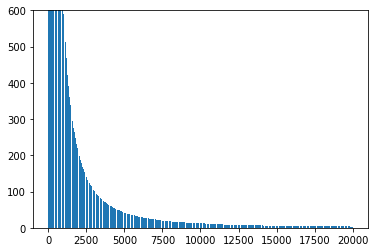

In [7]:
plt.ylim(ymax=600)
plt.bar(range(20000), l[:20000])
plt.show()

In [8]:
print(l[0])

469926


In [9]:
class Lang_Test:
    def __init__(self):
        self.vocab0 = {"<START>": 100000001, "<UNK>": 100000000}

    def addSentence(self, sent):
        for word in sent.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word in self.vocab0:
            self.vocab0[word] += 1
        else:
            self.vocab0[word] = 1

    def createDictionary(self):
        tokens = list(self.vocab0.keys())
        freqs = list(self.vocab0.values())
        sidx = np.argsort(freqs)[::-1]
        word2index = OrderedDict([(tokens[s], i) for i, s in enumerate(sidx)])
        index2word = OrderedDict([(i, tokens[s]) for i, s in enumerate(sidx)])
        return word2index, index2word

In [10]:
lang_test = Lang_Test()

In [11]:
for sent in df['text']:
    lang_test.addSentence(sent)

In [12]:
word2index, index2word = lang_test.createDictionary()

In [13]:
index2word[0]

'<START>'

In [14]:
index2word[1]

'<UNK>'

In [15]:
index2word[2]

'.'